In [114]:
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

In [134]:
#Helper functions
def load_image(path):
  img = tf.io.read_file(path)
  img = tf.io.decode_jpeg(img, channels=3)
  img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  return img
def display_image(path):
  img = plt.imread(path)
  plt.figure(figsize=(20,10))
  plt.imshow(img)
def drow_bounding_box(image, bbbox, color=(255, 0, 0),thickness=5):
  height = image.shape[0]
  width = image.shape[1]
  for box in bbbox:
    y1 = int(height * box[0])
    x1 = int(width * box[1])
    y2 = int(height * box[2])
    x2 = int(width * box[3])
    start_point = (x1, y1)
    end_point = (x2, y2)
    image = cv2.rectangle(image, start_point, end_point, color, thickness)
  plt.figure(figsize=(20,10))
  plt.imshow(image)
  return None

In [135]:
#Load Model
module_handle = 'https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1'
detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [136]:
#Detect objects
image_path = '/content/Naxos_Taverna.jpeg'
img = load_image(image_path)
result = detector(img)

In [137]:
def show_prediction(image_path, result, thrld):
  arr = result['detection_scores'].numpy()
  idx = arr > thrld
  confidence = arr[idx]
  predicted_object = confidence.shape[0]
  bbbox = result['detection_boxes'].numpy()[0:predicted_object]
  object_name = result['detection_class_entities'].numpy()[0:predicted_object]
  img = plt.imread(image_path)
  drow_bounding_box(img, bbbox)
  print("Predicted image:",object_name)
  print("with confidence:", confidence)

Predicted image: [b'Table' b'Chair' b'Chair' b'Table' b'Chair']
with confidence: [0.81900215 0.8180778  0.73777753 0.70250046 0.7004615 ]


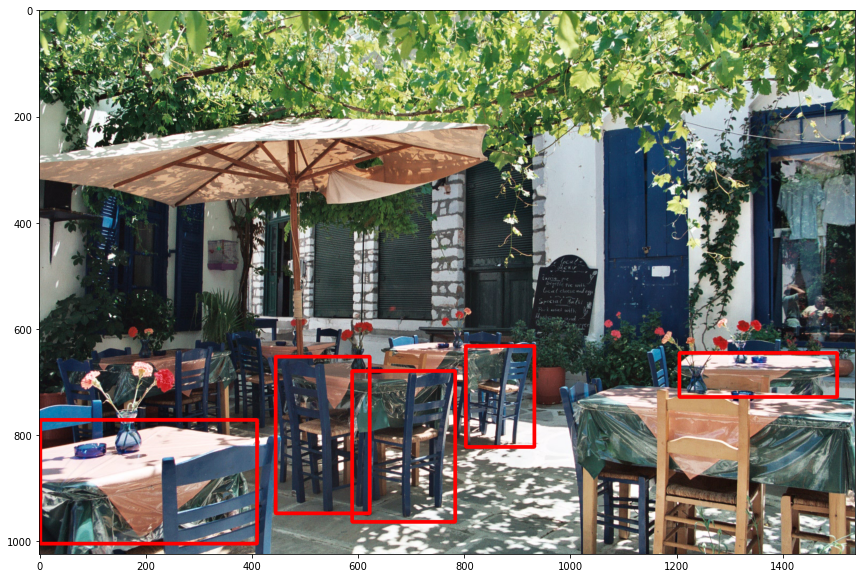

In [139]:
show_prediction(image_path, result, 0.7)